# Student Exam Scores
(explanation/details here)

## Load the Data
Load the data from `exams.csv` and store it in a MyPyTable object named exams_table.

In [5]:
import os
import importlib

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

exams_fname = os.path.join("input_data", "exams.csv")
exams_table = MyPyTable()
exams_table.load_from_file(exams_fname)

## Visualize Test Score Distributions
Displaying the distributions of the scores for each exam will help with the discretization process.

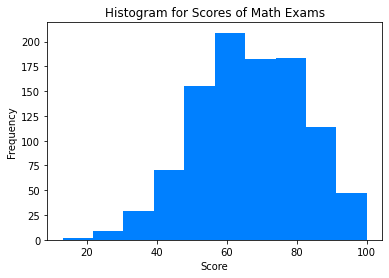

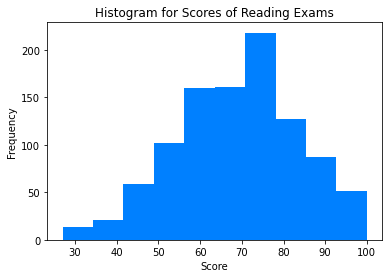

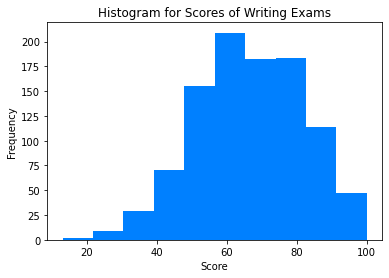

In [6]:
import plot_utils
importlib.reload(plot_utils)

math_data = exams_table.get_column("math score")
title = "Histogram for Scores of Math Exams"
plot_utils.plot_histogram(math_data, "Score", "Frequency", title)

reading_data = exams_table.get_column("reading score")
title = "Histogram for Scores of Reading Exams"
plot_utils.plot_histogram(reading_data, "Score", "Frequency", title)

writing_data = exams_table.get_column("math score")
title = "Histogram for Scores of Writing Exams"
plot_utils.plot_histogram(writing_data, "Score", "Frequency", title)

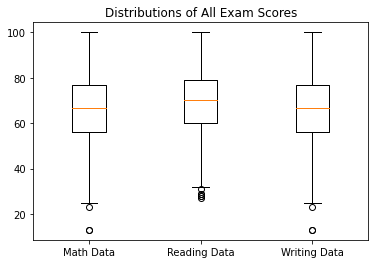

66.396
69.002
66.396


In [7]:
all_exam_scores = [math_data, reading_data, writing_data]
chart_title = "Distributions of All Exam Scores"
plot_utils.box_plot(all_exam_scores, ["Math Data", "Reading Data", "Writing Data"], chart_title)

print(sum(math_data) / len(math_data))
print(sum(reading_data) / len(reading_data))
print(sum(writing_data) / len(writing_data))

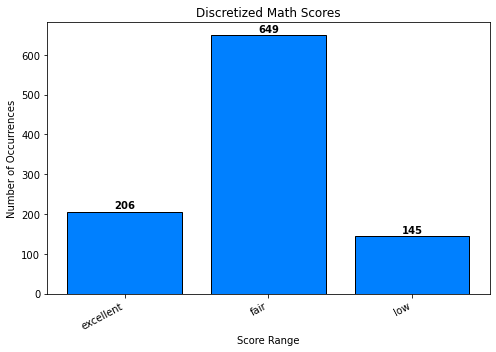

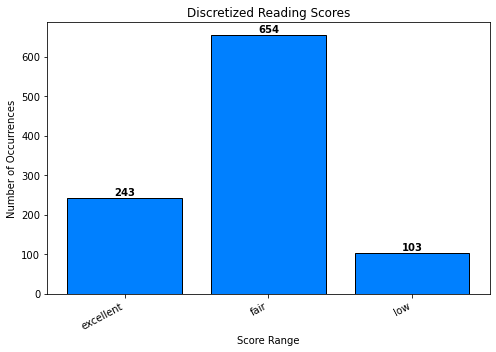

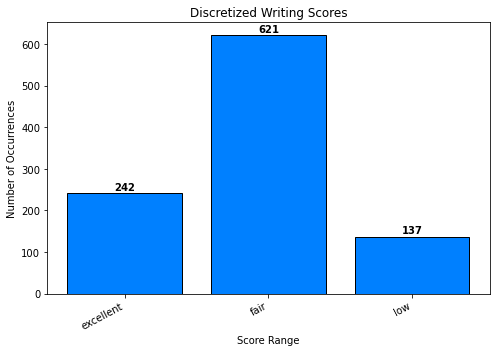

In [8]:
import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

importlib.reload(plot_utils)

# math_col = exams_table.get_column("math score")
# reading_col = exams_table.get_column("reading score")
# writing_col = exams_table.get_column("writing score")

# math_list = []
# reading_list = []
# writing_list = []
# for index, score in enumerate(math_col):
#     discretized = myutils.exam_score_discretizer(int(score))
#     math_list.append(discretized)
#     discretized = myutils.exam_score_discretizer(int(reading_col[index]))
#     reading_list.append(discretized)
#     discretized = myutils.exam_score_discretizer(int(writing_col[index]))
#     writing_list.append(discretized)

discretized_table = myutils.discretize_columns(exams_table, ["math score", "reading score", "writing score"], \
    myutils.exam_score_discretizer)

math_scores = discretized_table.get_column("math score")
reading_scores = discretized_table.get_column("reading score")
writing_scores = discretized_table.get_column("writing score")

#call get frequencies, show/visualize percentage of low medium and high 
ma_values, ma_counts = discretized_table.get_column_frequencies("math score")
plot_utils.plot_bar_chart(ma_values, ma_counts, "Score Range", "Number of Occurrences", \
    "Discretized Math Scores", True, (7, 5))

re_values, re_counts = discretized_table.get_column_frequencies("reading score")
plot_utils.plot_bar_chart(re_values, re_counts, "Score Range", "Number of Occurrences", \
    "Discretized Reading Scores", True, (7, 5))

wr_values, wr_counts = discretized_table.get_column_frequencies("writing score")
plot_utils.plot_bar_chart(wr_values, wr_counts, "Score Range", "Number of Occurrences", \
    "Discretized Writing Scores", True, (7, 5))

In [9]:
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyDecisionTreeClassifier, \
    MyRandomForestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

"""X_values = []
for index, val in enumerate(math_list):
    X_values.append([val, reading_list[index]])
y_values = writing_list.copy()"""

X_values = []
for index, val in enumerate(reading_list):
    X_values.append([val, writing_list[index]])
y_values = math_list.copy()

"""X_values = []
for index, val in enumerate(math_list):
    X_values.append([val, writing_list[index]])
y_values = reading_list.copy()"""

folds = myevaluation.stratified_kfold_split(X_values, y_values, 10, 0, True)

dummy_clf = MyDummyClassifier()
myutils.calc_classifier_performance(X_values, y_values, dummy_clf, "Dummy", folds, "excellent", "score")

Dummy Classifier Performance Metrics:
Accuracy: 0.6491
Error rate: 0.3509
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
score        excellent    fair    low    Total    Recognition (%)
---------  -----------  ------  -----  -------  -----------------
excellent            0     206      0      206                  0
fair                 0     649      0      649                100
low                  0     145      0      145                  0


In [10]:
knn_clf = MyKNeighborsClassifier()
myutils.calc_classifier_performance(X_values, y_values, knn_clf, "kNN", folds, "excellent", "score")

kNN Classifier Performance Metrics:
Accuracy: 0.2711
Error rate: 0.7289
Precision: 0.2379
Recall: 0.9324
F1 Score: 0.379
Confusion Matrix:
score        excellent    fair    low    Total    Recognition (%)
---------  -----------  ------  -----  -------  -----------------
excellent          192      14      0      206              93.2
fair               569      57     23      649               8.78
low                 47      76     22      145              15.17


In [11]:
tree_clf = MyDecisionTreeClassifier()
myutils.calc_classifier_performance(X_values, y_values, tree_clf, "Decision Tree", folds, "excellent", "score")

Decision Tree Classifier Performance Metrics:
Accuracy: 0.753
Error rate: 0.247
Precision: 0.6173
Recall: 0.7221
F1 Score: 0.664
Confusion Matrix:
score        excellent    fair    low    Total    Recognition (%)
---------  -----------  ------  -----  -------  -----------------
excellent          149      57      0      206              72.33
fair                93     506     50      649              77.97
low                  0      47     98      145              67.59


In [12]:
#X_vals = exams_table.get_other_columns(["math score", "reading score", "writing score"]).data
forest_clf = MyRandomForestClassifier(40, 7, 2)
myutils.calc_classifier_performance(X_values, y_values, forest_clf, "Random Forest", folds, "excellent", "score")

Random Forest Classifier Performance Metrics:
Accuracy: 0.753
Error rate: 0.247
Precision: 0.6173
Recall: 0.7221
F1 Score: 0.664
Confusion Matrix:
score        excellent    fair    low    Total    Recognition (%)
---------  -----------  ------  -----  -------  -----------------
excellent          149      57      0      206              72.33
fair                93     506     50      649              77.97
low                  0      47     98      145              67.59
